# Manipulando un documento .csv del Évola

### Con _DelimitedFiles_

In [12]:
using DelimitedFiles

In [13]:
wikiEVDraw = DelimitedFiles.readdlm("wikipediaEVDraw.csv", ',')

54×9 Array{Any,2}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953
 "6 Sep 2015"   28147  11291  3792  2530  …  4808     13683     3953
 "30 Aug 2015"  28073  11290  3792  2529     4808     13609     3953
 "16 Aug 2015"  27952  11284  3786  2524     4808     13494     3952
 ⋮                                        ⋱                     
 "9 Aug 2014"    18

Cambiaremos el formato de la primer columna a formato DateTime 

In [4]:
using Dates

Usando primero un ciclo **for**

In [15]:
columna1 = wikiEVDraw[:,1]
for i = 1:length(columna1)
    columna1[i] = Dates.DateTime.(columna1[i], "d u y")
end

In [17]:
columna1

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

Ahora con la _notación punto_ directo en el arreglo

In [18]:
wikiEVDraw[:,1] = Dates.DateTime.(wikiEVDraw[:,1], "d u y")
wikiEVDraw

54×9 Array{Any,2}:
 2015-11-25T00:00:00  28637  11314  3804  2536  …  4808     14122     3955
 2015-11-18T00:00:00  28634  11314  3804  2536     4808     14122     3955
 2015-11-11T00:00:00  28635  11314  3805  2536     4808     14122     3955
 2015-11-04T00:00:00  28607  11314  3810  2536     4808     14089     3955
 2015-10-25T00:00:00  28539  11298  3806  2535     4808     14061     3955
 2015-10-18T00:00:00  28476  11298  3803  2535  …  4808     14001     3955
 2015-10-11T00:00:00  28454  11297  3800  2534     4808     13982     3955
 2015-09-27T00:00:00  28388  11296  3805  2533     4808     13911     3955
 2015-09-20T00:00:00  28295  11295  3800  2532     4808     13823     3955
 2015-09-13T00:00:00  28220  11291  3792  2530     4808     13756     3953
 2015-09-06T00:00:00  28147  11291  3792  2530  …  4808     13683     3953
 2015-08-30T00:00:00  28073  11290  3792  2529     4808     13609     3953
 2015-08-16T00:00:00  27952  11284  3786  2524     4808     13494     3952
 ⋮    

Ahora manejaremos todos estos datos para poder manipularlos con funciones de Julia y así poder graficar.

In [20]:
desde22mar(x) = Dates.datetime2rata(x) - Dates.datetime2rata(columna1[end])
epidays = Array{Int64}(undef, length(columna1))
for i = 1:length(columna1)
    epidays[i] = desde22mar(columna1[i])
end

In [21]:
wikiEVDraw[:,1] = epidays

54-element Array{Int64,1}:
 613
 606
 599
 592
 582
 575
 568
 554
 547
 540
 533
 526
 512
   ⋮
 140
 130
 123
 114
 102
  87
  66
  51
  40
  23
   9
   0

Creando un archivo `.csv`

In [23]:
DelimitedFiles.writedlm("wikipediaEVDdatesconverted.csv", wikiEVDraw, ',')

### Con CSV.jl

https://juliadata.github.io/CSV.jl/stable/

In [44]:
#using Pkg; Pkg.add("CSV"); Pkg.add("DataFrames")
using CSV, DataFrames

In [46]:
df = CSV.File("wikipediaEVDraw.csv", delim= ',', header = 0) |> DataFrame
df

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,String,Int64,Int64,Int64,Int64,String,String,String,String
1,25 Nov 2015,28637,11314,3804,2536,10675,4808,14122,3955
2,18 Nov 2015,28634,11314,3804,2536,10672,4808,14122,3955
3,11 Nov 2015,28635,11314,3805,2536,10672,4808,14122,3955
4,4 Nov 2015,28607,11314,3810,2536,10672,4808,14089,3955
5,25 Oct 2015,28539,11298,3806,2535,10672,4808,14061,3955
6,18 Oct 2015,28476,11298,3803,2535,10672,4808,14001,3955
7,11 Oct 2015,28454,11297,3800,2534,10672,4808,13982,3955
8,27 Sep 2015,28388,11296,3805,2533,10672,4808,13911,3955
9,20 Sep 2015,28295,11295,3800,2532,10672,4808,13823,3955


Para manipular dataframes hay documentación

https://syl1.gitbook.io/julia-language-a-concise-tutorial/useful-packages/dataframes

por lo mientras, renombremos una columna

In [50]:
rename!(df, "Column1" => "Fecha")

,Fecha,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,String,Int64,Int64,Int64,Int64,String,String,String,String
1,25 Nov 2015,28637,11314,3804,2536,10675,4808,14122,3955
2,18 Nov 2015,28634,11314,3804,2536,10672,4808,14122,3955
3,11 Nov 2015,28635,11314,3805,2536,10672,4808,14122,3955
4,4 Nov 2015,28607,11314,3810,2536,10672,4808,14089,3955
5,25 Oct 2015,28539,11298,3806,2535,10672,4808,14061,3955
6,18 Oct 2015,28476,11298,3803,2535,10672,4808,14001,3955
7,11 Oct 2015,28454,11297,3800,2534,10672,4808,13982,3955
8,27 Sep 2015,28388,11296,3805,2533,10672,4808,13911,3955
9,20 Sep 2015,28295,11295,3800,2532,10672,4808,13823,3955


# Gráficas

Primero cargamos los datos

In [54]:
using DelimitedFiles
EVDdata = DelimitedFiles.readdlm("wikipediaEVDdatesconverted.csv", ',')
epidays = EVDdata[:,1]
allcases = EVDdata[:,2];

Para consultar la documentación de plots:

http://docs.juliaplots.org/latest/

In [57]:
#using Pkg; Pkg.add("Plots")
using Plots

In [58]:
gr()

Plots.GRBackend()

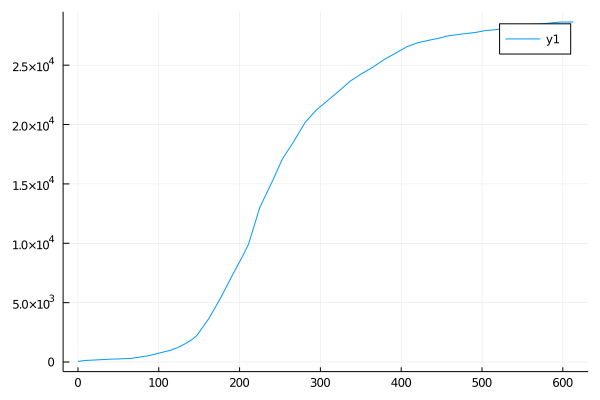

In [59]:
plot(epidays, allcases)

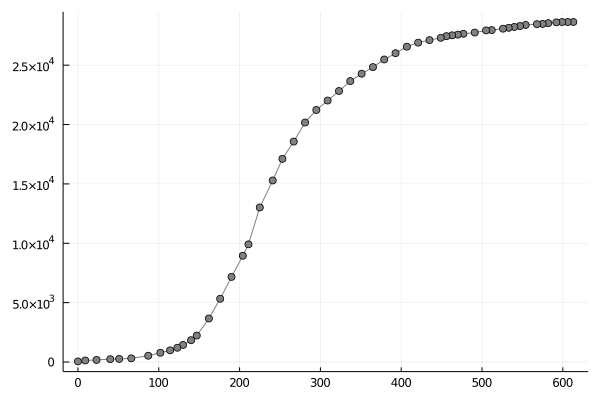

In [70]:
plot(epidays, allcases, line = (:path, "gray"), marker = (:dot, 4, "gray"), c = :orange, legend = false)

In [71]:
savefig("WAfricanEVD.png")

 Usando **if** y poniendo varias gráficas en una sola figura

In [72]:
EVDdata[end-9:end, :] # Tenemos que quitar los valores faltantes, los cambiaremos por 0

10×9 Array{Any,2}:
 123  1201  672  427  319  249     129     525     224
 114   982  613  411  310  174     106     397     197
 102   779  481  412  305  115      75     252     101
  87   528  337  398  264   33      24      97      49
  66   309  202  281  186   12      11      16       5
  51   260  182  248  171   12      11        "–"     "–"
  40   239  160  226  149   13      11        "-"     "-"
  23   176  110  168  108    8       2        "–"     "–"
   9   130   82  122   80    8       2        "–"     "–"
   0    49   29   49   29     "–"     "–"     "–"     "–"

In [79]:
renglones, columnas = size(EVDdata)
for j = 1:columnas
    for i = 1:renglones
        if !isdigit(string(EVDdata[i,j])[1])
            EVDdata[i,j] = 0
        end
    end
end

In [80]:
EVDdata[end-9:end, :]

10×9 Array{Any,2}:
 123  1201  672  427  319  249  129  525  224
 114   982  613  411  310  174  106  397  197
 102   779  481  412  305  115   75  252  101
  87   528  337  398  264   33   24   97   49
  66   309  202  281  186   12   11   16    5
  51   260  182  248  171   12   11    0    0
  40   239  160  226  149   13   11    0    0
  23   176  110  168  108    8    2    0    0
   9   130   82  122   80    8    2    0    0
   0    49   29   49   29    0    0    0    0

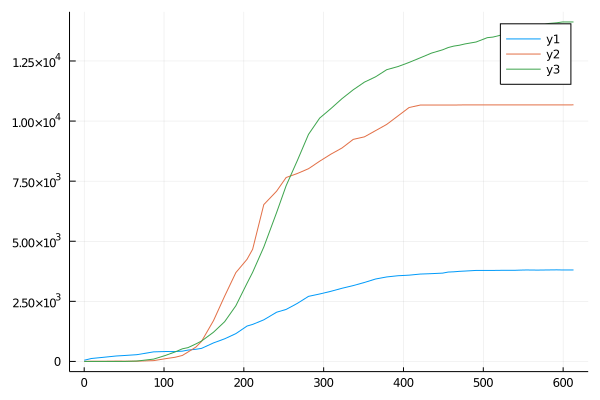

In [100]:
epidays = EVDdata[:,1]
EVDcasesbycountry = Int64.(EVDdata[:,[4,6,8]])

using Plots
gr()
plot(epidays, EVDcasesbycountry)

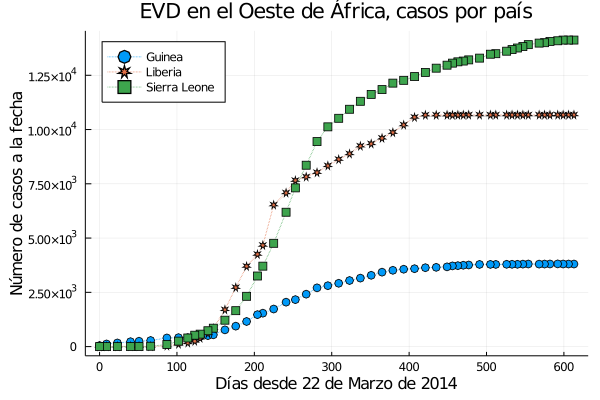

In [109]:
plot(epidays, EVDcasesbycountry,
legend = :topleft,
marker = ([:octagon :star7 :square], 4), # Nota que no lleva coma entre cada opción
label = ["Guinea" "Liberia" "Sierra Leone"],
title = "EVD en el Oeste de África, casos por país",
xlabel = "Días desde 22 de Marzo de 2014",
ylabel = "Número de casos a la fecha",
line = (:dot))

In [110]:
savefig("Tres_paises.png")

(-5, 36)
(-4, 15)
(-3, 0)
(-2, -9)
(-1, -12)
(0, -9)
(1, 0)
(2, 15)
(3, 36)
(4, 63)
(5, 96)


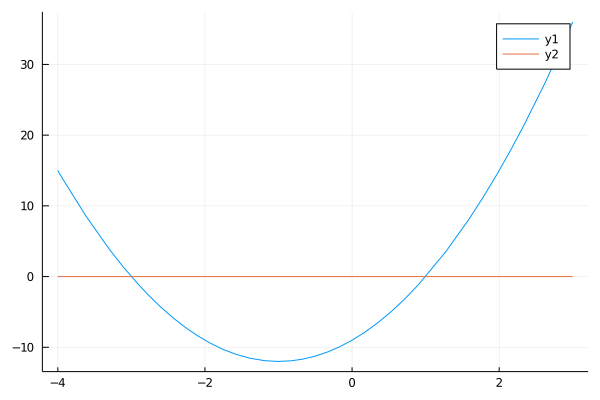

In [112]:
f(x) = 3 * x^2 + 6 * x - 9
for x = -5:5    
  println("(",x, ", ", f(x), ")")
end
using Plots
gr() # Activate the GR backend for use with Plots
plot(f, -4, 3) # plot f over [-4,4]
plot!(zero, -4, 3)